## Example usages of the ZM package

In [1]:
import ZM 
import matplotlib.pyplot as plt  # Note: no imports are required to use ZM except for importing ZM itself. This is simply for extraneous graphing below.

In [2]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    return data

In [17]:
# generate x and y as binary strings, both of length 10,000,001
y = read_data('data/HMM1.txt') 
x = read_data('data/HMM2.txt')

# generate N values 
Ns = [pow(2,k) for k in range(1, 16)]
print(Ns)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]


In [4]:
# generic usage to obtain the modified and original ZM estimates
mZM_estimates = ZM.compute_Q_mult(y, x, Ns) # mZM
ZM_estimates = ZM.compute_Q_mult(y, x, Ns, mZM=False) # original ZM

Computing mZM estimates (base 0).
N: 2, M: 2, Q: 0.6931471805599453
N: 4, M: 4, Q: 1.3862943611198906
N: 8, M: 8, Q: 0.6931471805599453
N: 16, M: 16, Q: 0.6398281666707187
N: 32, M: 32, Q: 0.7997852083383984
N: 64, M: 64, Q: 0.7701635339554948
N: 128, M: 128, Q: 0.8457667432520433
N: 256, M: 256, Q: 0.736085501479588
N: 512, M: 512, Q: 0.705201914134901
N: 1024, M: 1024, Q: 0.6924026615690109
N: 2048, M: 2048, Q: 0.6769332114240402
N: 4096, M: 4096, Q: 0.7048954378575715
N: 8192, M: 8192, Q: 0.7006248899147558
N: 16384, M: 16384, Q: 0.7052184880124099
N: 32768, M: 32768, Q: 0.708330533625213
Finished.
Computing orignal ZM estimates (base 0).
N: 2, M: 2, Q: 0.6931471805599453
N: 4, M: 4, Q: 1.0397207708399179
N: 8, M: 8, Q: 0.7797905781299383
N: 16, M: 16, Q: 0.5198603854199589
N: 32, M: 32, Q: 0.8664339756999316
N: 64, M: 64, Q: 0.8447731263074333
N: 128, M: 128, Q: 0.9476621609218002
N: 256, M: 256, Q: 0.7581297287374401
N: 512, M: 512, Q: 0.6945009836469764
N: 1024, M: 1024, Q: 0.717

In [23]:
# obtain the data for two sequences of 1,000,000 fair coin flips 
y = read_data('data/coin_flip1.txt') 
x = read_data('data/coin_flip2.txt')

# usage specifying logartihm base 2 in computations and without displaying output
mZM_estimates_base2 = ZM.compute_Q_mult(y, x, Ns, verbose=False, logbase=2) 

### Miscellaneous Graphing

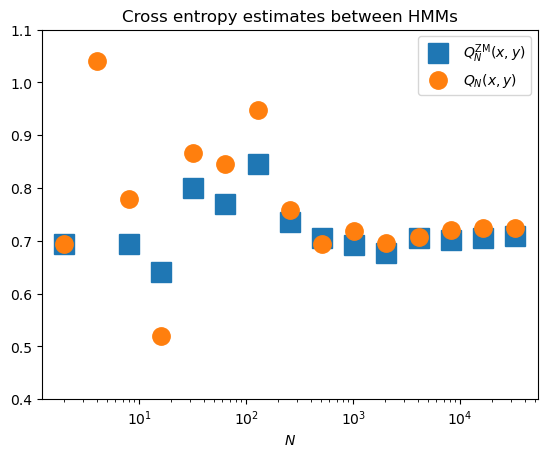

In [6]:
_, ax = plt.subplots()
ax.plot(Ns, mZM_estimates, 's',
        label=r"$ Q_N^{\mathrm{ZM}}(x,y)$", markersize=14) 
ax.plot(Ns, ZM_estimates, '.', 
        label=r"$Q_N(x,y)$", markersize=25) 

ax.set_xscale('log')
plt.xlabel(r"$N$")
ax.set_ylim(0.4, 1.1)
plt.legend()
plt.title('Cross entropy estimates between HMMs')
plt.show()

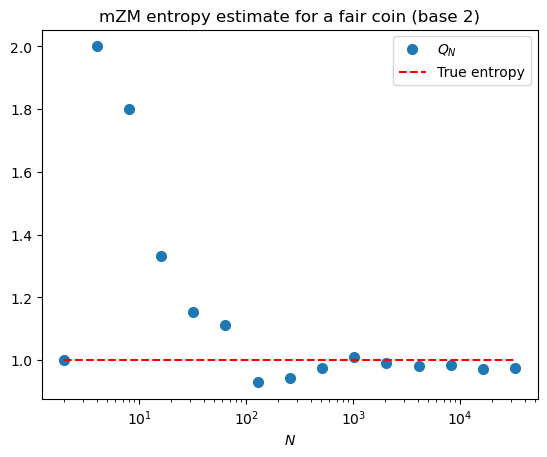

In [7]:
_, ax = plt.subplots()
ax.plot(Ns, mZM_estimates_base2, '.',
        label=r"$ Q_N$", markersize=14) 
ax.plot(Ns, [1]*len(Ns), 'r--', 
        label=r"True entropy") 

ax.set_xscale('log')
plt.xlabel(r"$N$")
plt.legend()
plt.title('mZM entropy estimate for a fair coin (base 2)')
plt.show()

### Estimating the KL divergence rate using a LZ estimate for the specific entropy

In [54]:
# generate x and y as binary strings, both of length 10,000,001
y = read_data('data/coin_flip1.txt') 
x = read_data('data/biased_coin_flip.txt')

# generate N values 
Ns = [pow(2,k) for k in range(1, 16)]
print(Ns)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]


In [57]:
KL_estimates = ZM.estimate_KL_mult(y, x, Ns)

Computing KL estimates (base 0).
N: 2, M: 2, KL: 0.6931471805599453
N: 4, M: 4, KL: 1.0397207708399179
N: 8, M: 8, KL: 1.3862943611198904
N: 16, M: 16, KL: 1.1167371242354676
N: 32, M: 32, KL: -0.0716046236848259
N: 64, M: 64, KL: 0.16550333846270981
N: 128, M: 128, KL: 0.30010251370677377
N: 256, M: 256, KL: 0.1995048480879651
N: 512, M: 512, KL: 0.3423737592397351
N: 1024, M: 1024, KL: 0.439161700660498
N: 2048, M: 2048, KL: 0.20323244717655098
N: 4096, M: 4096, KL: 0.259455519712149
N: 8192, M: 8192, KL: 0.2662123730616138
N: 16384, M: 16384, KL: 0.28373271559631774
N: 32768, M: 32768, KL: 0.2913307083231209
Finished.


### We can also just estimate the specific entropy of signals using the Lempel-Ziv procedure:

In [56]:
print(f' Entropy rate of a fair coin: {ZM.compute_LZ_estimate(y, logbase=2)}')
print(f' Entropy rate of a biased coin (p=0.9): {ZM.compute_LZ_estimate(x, logbase=2)}')

 Entropy rate of a fair coin: 1.098601616236376
 Entropy rate of a biased coin (p=0.9): 0.5402316444753776
